# 커피지수 (스타벅스 + 커피빈) / (이디야, 빽다방)

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm_notebook
from glob import glob
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 데이터를 읽고 하나로 합쳤습니다

In [298]:
files = glob("./data/지역/*.csv")
df = pd.read_csv(files[0],sep='|')
for file in tqdm_notebook(files[1:]):
    df = df.append(pd.read_csv(file,sep='|'))
# do_list = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북']
# df = pd.read_csv('./data/지역/소상공인시장진흥공단_상가(상권)정보_강원_202009.csv',sep='|')
# for do in tqdm_notebook(do_list[1:]):
#     df = df.append(pd.read_csv(f'./data/소상공인시장진흥공단_상가(상권)정보_{do}_202009.csv',sep='|'))

In [751]:
df_cafe = df[df['상권업종중분류명'].str.contains("카페")][["상호명",'지점명','도로명주소','경도','위도']]
df_cafe = df_cafe.fillna('')
df_cafe.head()

,상호명,지점명,도로명주소,경도,위도
20,펠로톤,,강원도 강릉시 임영로 115,128.893468,37.751919
23,키즈까페아이사랑,,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315
30,상유재카페,,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458
213,동물과사람,,강원도 원주시 천매봉길 117,127.943047,37.326277
274,카페비엔또,,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503


### 도로명 주소로 시도 추가

In [752]:
df_cafe['광역시도'] = df_cafe['도로명주소'].str.split().str[0]
df_cafe['시군구'] = df_cafe['도로명주소'].str.split().str[1]
df_cafe['행정구'] = df_cafe['도로명주소'].str.split().str[2]

df_cafe.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,행정구
20,펠로톤,,강원도 강릉시 임영로 115,128.893468,37.751919,강원도,강릉시,임영로
23,키즈까페아이사랑,,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315,강원도,강릉시,성덕포남로
30,상유재카페,,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458,강원도,정선군,정선읍
213,동물과사람,,강원도 원주시 천매봉길 117,127.943047,37.326277,강원도,원주시,천매봉길
274,카페비엔또,,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503,강원도,영월군,영월읍


In [753]:
df_cafe[df_cafe['광역시도'] == '서울특별시']

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,행정구
0,커피빈코리아선릉로93길점,코리아선릉로93길점,서울특별시 강남구 선릉로93길 6,127.047883,37.505675,서울특별시,강남구,선릉로93길
4,고려대학교교육관쎄리오점,,서울특별시 성북구 안암로 145,127.031702,37.588485,서울특별시,성북구,안암로
7,스완카페트,,서울특별시 영등포구 도신로10가길 11-1,126.897710,37.503693,서울특별시,영등포구,도신로10가길
25,왕실,,서울특별시 중구 남대문로 52-13,126.982419,37.562274,서울특별시,중구,남대문로
29,커피빈,코리아교대점,서울특별시 서초구 서초중앙로 118,127.014217,37.492388,서울특별시,서초구,서초중앙로
...,...,...,...,...,...,...,...,...
367498,와플대학,상일동역캠퍼스,서울특별시 강동구 고덕로79길 29,127.164702,37.558063,서울특별시,강동구,고덕로79길
367523,hebecoffee,,서울특별시 중구 필동로 32,126.995981,37.558768,서울특별시,중구,필동로
367524,티랩차연구소,,서울특별시 강남구 테헤란로 147,127.035662,37.500836,서울특별시,강남구,테헤란로
367525,사사이프로젝트,,서울특별시 광진구 광나루로 428,127.076909,37.545822,서울특별시,광진구,광나루로


### 스타벅스와 커피빈, 이디야와 빽다방 따로 추림

In [754]:
df_cafe_star = df_cafe[df_cafe['상호명'].str.contains("스타벅스|starbucks",case=False)].reset_index()
df_cafe_Coffe = df_cafe[df_cafe['상호명'].str.contains("커피빈|coffeebean",case=False)].reset_index()

In [755]:
df_cafe_edi = df_cafe[df_cafe['상호명'].str.contains("이디야|ediya",case=False)].reset_index()
df_cafe_paik = df_cafe[df_cafe['상호명'].str.contains("빽다방|PAIKSCOFFEE",case=False)].reset_index()

In [756]:
df_cafe_star.to_csv('./data/starbucks.csv')
df_cafe_Coffe.to_csv('./data/coffeebean.csv')
df_cafe_edi.to_csv('./data/ediya.csv')
df_cafe_paik.to_csv('./data/paikscoffee.csv')

### 각 ID 추가

In [757]:
tmp_gu_dict = {
    '수원':['장안구','권선구','팔달구','영통구'],
    '성남':['수정구','중원구','분당구'],
    '안양':['만안구','동안구'],
    '안산':['상록구','단원구'],
    '고양':['덕양구','일산동구','일산서구'],
    '용인':['처인구','기흥구','수지구'],
    '청주':['상당구','서원구','흥덕구','청원구'],
    '천안':['동남구','서북구'],
    '전주':['완산구','덕진구'],
    '포항':['남구','북구'],
    '창원':['의창구','성산구','진해구','마산합포구','마산회원구']
}


In [758]:
def mk_si_name(coffee_shop):
    si = [None] * len(coffee_shop)
    for n in coffee_shop.index:
        # [-3:] 끝 3글자
        if coffee_shop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
            # [:-1] 끝 1글자 빼고 나머지
            if coffee_shop['시군구'][n][:-1] =='고성' and coffee_shop['광역시도'][n] =='강원도':
                si[n] = '고성(강원)'
            elif coffee_shop['시군구'][n][:-1]=='고성' and coffee_shop['광역시도'][n] =='경상남도':
                si[n] = '고성(경남)'
            else:
                try:
                    si[n] = coffee_shop['시군구'][n][:-1]
                except:
                    pass
                
            for keys, values in tmp_gu_dict.items():
                if coffee_shop['행정구'][n] in values:
                    if len(coffee_shop['행정구'][n])==2:
                        si[n] = keys + ' '+coffee_shop['행정구'][n]
                        
                    elif coffee_shop['행정구'][n] in ['마산합포구', '마산회원구']:
                        si[n] = keys + ' '+coffee_shop['행정구'][n][2:-1]
                    else:
                        si[n]  = keys + ' '+coffee_shop['행정구'][n][:-1]
                        
        elif coffee_shop['광역시도'][n] == '세종특별자치시':
            si[n]= '세종'
        else:
            if len(coffee_shop['시군구'][n]) == 2:
                si[n] = coffee_shop['광역시도'][n][:2]+ ' '+coffee_shop['시군구'][n]
            else:
                si[n] = coffee_shop['광역시도'][n][:2]+ ' '+ coffee_shop['시군구'][n][:-1]
    return si

In [759]:
def insert_ID(a):
    a['ID'] = mk_si_name(a)
def pivot_cafes(a):
    return a.pivot_table('도로명주소',index=['ID'],aggfunc='count')

In [760]:
cafe_list = [df_cafe_star,df_cafe_Coffe,df_cafe_edi,df_cafe_paik]
for i in cafe_list:
    insert_ID(i)

In [761]:
a = pivot_cafes(df_cafe_star).rename(columns={'도로명주소':'스타벅스 매장수'})
b = pivot_cafes(df_cafe_Coffe).rename(columns={'도로명주소':'커피빈 매장수'})
c = pivot_cafes(df_cafe_edi).rename(columns={'도로명주소':'이디야 매장수'})
d = pivot_cafes(df_cafe_paik).rename(columns={'도로명주소':'빽다방 매장수'})
cafe_count = pd.concat([a,b,c,d],axis=1).fillna(0).reset_index().rename(columns={'index':'ID'})
cafe_count

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수
0,강릉,5.0,0.0,14.0,2.0
1,거제,5.0,0.0,7.0,0.0
2,경산,8.0,0.0,9.0,3.0
3,경주,8.0,2.0,24.0,2.0
4,계룡,1.0,0.0,0.0,0.0
...,...,...,...,...,...
232,합천,0.0,0.0,1.0,0.0
233,홍성,0.0,0.0,3.0,2.0
234,화천,0.0,0.0,1.0,0.0
235,횡성,0.0,0.0,1.0,0.0


### 아에 아무 가게도 없는 곳 0입력

In [762]:
not_exist_list = list(set(draw_korea['ID'].unique()) - set(cafe_count['ID'].unique()))
not_exist_list

['함평', '장수', '신안', '구례', '화순', '울릉', '군위', '영월', '보성', '의성', '장흥', '의령', '진안']

In [763]:
for i in not_exist_list:
    row = [i,0,0,0,0]
    cafe_count = cafe_count.append(cafe_count.iloc[-1], ignore_index=True)
    cafe_count.iloc[-1] = row
cafe_count.loc[-8:]

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수
0,강릉,5.0,0.0,14.0,2.0
1,거제,5.0,0.0,7.0,0.0
2,경산,8.0,0.0,9.0,3.0
3,경주,8.0,2.0,24.0,2.0
4,계룡,1.0,0.0,0.0,0.0
...,...,...,...,...,...
245,보성,0.0,0.0,0.0,0.0
246,의성,0.0,0.0,0.0,0.0
247,장흥,0.0,0.0,0.0,0.0
248,의령,0.0,0.0,0.0,0.0


### 순위

In [764]:
cafe_count.sort_values(by='스타벅스 매장수',ascending=False).head()[['ID','스타벅스 매장수']]

,ID,스타벅스 매장수
73,서울 강남,87.0
96,서울 중구,57.0
87,서울 서초,49.0
99,성남 분당,47.0
90,서울 송파,34.0


In [765]:
cafe_count.sort_values(by='커피빈 매장수',ascending=False).head()[['ID','커피빈 매장수']]

,ID,커피빈 매장수
73,서울 강남,69.0
87,서울 서초,31.0
99,성남 분당,17.0
95,서울 종로,15.0
96,서울 중구,15.0


In [766]:
cafe_count.sort_values(by='이디야 매장수',ascending=False).head()[['ID','이디야 매장수']]

,ID,이디야 매장수
28,남양주,46.0
76,서울 강서,42.0
73,서울 강남,42.0
144,인천 남동,32.0
67,부천,32.0


In [767]:
cafe_count.sort_values(by='빽다방 매장수',ascending=False).head()[['ID','빽다방 매장수']]

,ID,빽다방 매장수
144,인천 남동,13.0
73,서울 강남,12.0
99,성남 분당,12.0
188,화성,11.0
41,대전 서구,10.0


### 커피지수 추가

In [768]:
cafe_count['coffee_index'] = (cafe_count['스타벅스 매장수'] + cafe_count['커피빈 매장수']) / (cafe_count['이디야 매장수'] + cafe_count['빽다방 매장수'])
# NaN처리
cafe_count['coffee_index'] = cafe_count['coffee_index'].fillna(0)
cafe_count['coffee_index']

0      0.312500
1      0.714286
2      0.666667
3      0.384615
4           inf
         ...   
245    0.000000
246    0.000000
247    0.000000
248    0.000000
249    0.000000
Name: coffee_index, Length: 250, dtype: float64

### cartogram

In [769]:
draw_korea_raw = pd.read_excel("./data/draw_korea_raw.xlsx")
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y','level_1':'x',0:'ID'},inplace=True)
draw_korea = draw_korea_raw_stacked
BORDER_LINES = [[(5, 1), (5, 2), (7, 2), (7, 3), (11,3), (11, 0)],
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], 
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4),(11, 3)], 
    [(8, 10), (8, 11), (6, 11), (6, 12)], 
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], 
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)],
    [(13, 5), (13, 6), (16, 6)],
    [(13, 5), (14, 5)],
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4),(24,2), (21, 2)],
    [(20, 5), (21, 5), (21, 6), (23, 6)],
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)],
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)],
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)],
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)],
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)],
]

In [770]:
# plt.figure(figsize=(8,11))
# for idx, row in draw_korea.iterrows():
#     if len(row['ID'].split()) == 2:
#         dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
#     elif row['ID'][:2]=='고성':
#         dispname = '고성'
#     else:
#         dispname = row['ID']
#     if len(dispname.splitlines()[-1]) >= 3:
#         fontsize, linespacing = 9.5,1.5
#     else:
#         fontsize, linespacing = 9.5,1.5
#     plt.annotate(dispname,(row['x']+0.5, row['y']+0.5),weight='bold',
#                 fontsize=fontsize,ha='center',va='center',
#                 linespacing=linespacing)
# for path in BORDER_LINES:
#     ys, xs = zip(*path)
#     # print(ys, xs)
#     plt.plot(xs,ys,c='black',lw=1.5)

# plt.gca().invert_yaxis()
# plt.axis('off')

# plt.tight_layout()
# plt.show()

In [771]:
# tmp_list = list(set(cafe_count['ID'].unique()) - set(draw_korea['ID'].unique()))
# for tmp in tmp_list:
#     cafe_count = cafe_count.drop(cafe_count[cafe_count['ID']==tmp].index)
# tmp_list

In [772]:
# inf 처리
cafe_count = cafe_count.replace([np.inf, -np.inf], 0)
# 카페가 아에 없는 지역이 있어서 join을 outer로 했습니다
cafe_count = pd.merge(cafe_count, draw_korea, how='left', on=['ID'])
cafe_count[cafe_count['coffee_index'] == np.inf]

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,coffee_index,y,x


In [773]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = .75
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])
    datalabel = targetData
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    mapdata = blockedMap.pivot_table(index='y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (6, 8))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] =='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8, 1.1
        else:
            fontsize, linespacing = 9, 0.9
            
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize= fontsize, ha='center', va='center', linespacing=linespacing)
        
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)
    
    plt.gca().invert_yaxis()
    plt.axis('off')
    cb =plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

### 커피지수

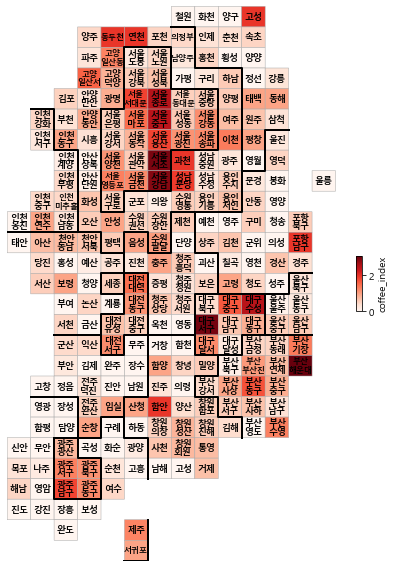

In [774]:
drawKorea('coffee_index', cafe_count, 'Reds')

### 지도에 그리기

In [775]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [776]:
cafe_count_folium = cafe_count.set_index('ID')
cafe_count_folium[cafe_count_folium.index == '신안'].head()

,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,coffee_index,y,x
ID,,,,,,,
신안,0.0,0.0,0.0,0.0,0.0,21,0


In [777]:
geo_path = './data/05. skorea_municipalities_geo_simple_수정.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))
map =folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data=geo_data,
              data= cafe_count_folium['coffee_index'],
              columns=[cafe_count_folium.index, cafe_count_folium['coffee_index']],
              fill_color='YlGnBu',
              key_on='feature.id')
title_html = '''
             <h3 align="center" style="font-size:20px"><b>카페지수</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

In [785]:
cafe_count[cafe_count['ID'].str.contains("인천")]

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,coffee_index,y,x
142,인천 강화,1.0,0.0,1.0,1.0,0.500000,5,1
143,인천 계양,3.0,0.0,12.0,6.0,0.166667,7,2
144,인천 남동,14.0,1.0,32.0,13.0,0.333333,10,2
145,인천 동구,2.0,0.0,2.0,0.0,1.000000,6,2
146,인천 미추홀,8.0,0.0,13.0,4.0,0.470588,9,2
147,인천 부평,11.0,2.0,26.0,2.0,0.464286,8,2
148,인천 서구,8.0,0.0,27.0,4.0,0.258065,6,1
149,인천 연수,14.0,7.0,14.0,7.0,1.000000,10,1
150,인천 중구,5.0,3.0,13.0,4.0,0.470588,9,1
224,인천 옹진,0.0,0.0,2.0,0.0,0.000000,10,0
